In [1]:
using Plots, Images

In [2]:
push!(LOAD_PATH, "./src/")
using TNLatent

In [4]:
# settings
T = Float64
MIS = T(0.9)
patchSize = [16, 16];  # the size should be devided by the image size without remainder

In [5]:
# read data
img = load("./lena.bmp")
x = image2Array(img)
xp = array2Patch(x, patchSize)
println(size(xp))
mask = genMask(size(xp), MIS)
xObs = xp .* mask;

┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278


(16, 16, 3, 256)


In [8]:
# model
opt = Optim{T}(
    iter = 300,
    init = "rand",
    initScale = 0.1,
    trun = eps(T),  # truncation level of factors
    isPrune = true,  # prune factors or not
    pruneMethod = "absolute",
    isPrint = 20,
    rotate = 100,  # rotate step
    ϵ = 1e-8  # convergence
)
rInit = ones(Int, ndims(xObs)) * 10
YEst, _, _ = TRLF_EM(xObs, mask, rInit, opt);

┌ Info: EM Algorithm for Multiplicative Gamma Process Tensor Ring Latent Factor Model.
└ @ TNLatent /home/barry/Publish_Code/TR_latent_factor/src/trlf_em_completion.jl:43


Epoch 20: Rank estimate is [10, 7, 8, 10], Change is 4.120812198458273e-6.
Epoch 40: Rank estimate is [10, 7, 8, 10], Change is 3.6710131444125456e-6.
Epoch 60: Rank estimate is [10, 6, 8, 10], Change is 2.463877442171105e-6.
Epoch 80: Rank estimate is [10, 6, 8, 10], Change is 1.913767458141381e-6.
Epoch 100: Rank estimate is [10, 6, 8, 10], Change is 1.1022895190161273e-6.
Epoch 120: Rank estimate is [10, 6, 7, 10], Change is 4.30709392606888e-7.
Epoch 140: Rank estimate is [10, 6, 7, 10], Change is 2.919413501214113e-7.
Epoch 160: Rank estimate is [10, 6, 7, 10], Change is 2.444954002730133e-7.
Epoch 180: Rank estimate is [10, 6, 7, 10], Change is 1.9157080721214383e-7.
Epoch 200: Rank estimate is [10, 6, 7, 10], Change is 1.6264280592113223e-7.
Epoch 220: Rank estimate is [10, 6, 7, 10], Change is 1.4257173577408108e-7.
Epoch 240: Rank estimate is [10, 6, 7, 10], Change is 1.61302659449905e-7.
Epoch 260: Rank estimate is [10, 6, 7, 10], Change is 4.111543379255462e-7.
Epoch 280: Ra

The PSNR is 25.067086982738562 | RSE is 0.10061792714737867 | Compression rate is 7.164492383937031.


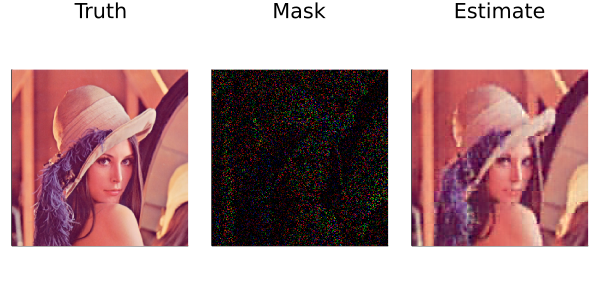

In [9]:
xEst = patch2Array(fullData(YEst), patchSize)
xMask = patch2Array(xObs, patchSize)
rse = RSE(x, xEst)
psnr = MyPSNR(x, xEst)
println("The PSNR is $psnr | RSE is $rse | Compression rate is $((256 * 256 * 3) / length(YEst)).")
gr(size = (600, 300))
plot(
    plot(img, title = "Truth"),
    plot(array2Image(xMask), title = "Mask"),
    plot(array2Image(xEst), title = "Estimate"),
    axis = nothing, layout = (1, 3)
)